In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. หน้าตาของ Users/Ratings/Movies**

In [ ]:
Users = pd.read_csv('/content/drive/MyDrive/MovieLens100K/u.user', sep = '|') #อ่านไฟล์ u.user จาก google drive
Users

,1,24,M,technician,85711
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101
...,...,...,...,...,...
937,939,26,F,student,33319
938,940,32,M,administrator,02215
939,941,20,M,student,97229
940,942,48,F,librarian,78209


In [ ]:
Users.columns = ['user id','age','gender','occupation','zip code'] #สร้าง column อ้างอิงไฟล์ README.TXT
Users

,user id,age,gender,occupation,zip code
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101
...,...,...,...,...,...
937,939,26,F,student,33319
938,940,32,M,administrator,02215
939,941,20,M,student,97229
940,942,48,F,librarian,78209


In [ ]:
Users.columns #Check column

Index(['user id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

In [ ]:
Ratings = pd.read_csv('/content/drive/MyDrive/MovieLens100K/u.data', sep = '\t') #อ่านไฟล์ u.data จาก google drive และ ให้เว้น \t
Ratings.columns = ['user id', 'item id' , 'rating' ,'timestamp'] #สร้าง column อ้างอิงจาก README.TXT
Ratings

,user id,item id,rating,timestamp
0,186,302,3,891717742
1,22,377,1,878887116
2,244,51,2,880606923
3,166,346,1,886397596
4,298,474,4,884182806
...,...,...,...,...
99994,880,476,3,880175444
99995,716,204,5,879795543
99996,276,1090,1,874795795
99997,13,225,2,882399156


In [ ]:
Ratings['timestamp'] = pd.to_datetime(Ratings['timestamp'],unit='s') #เปลี่ยน format ให้เป็น timestamp
Ratings.head()

,user id,item id,rating,timestamp
0,186,302,3,1998-04-04 19:22:22
1,22,377,1,1997-11-07 07:18:36
2,244,51,2,1997-11-27 05:02:03
3,166,346,1,1998-02-02 05:33:16
4,298,474,4,1998-01-07 14:20:06


In [ ]:
Movies = pd.read_csv('/content/drive/MyDrive/MovieLens100K/u.item2', sep = '|') #อ่านไฟล์ u.item2 จาก google drive และ ให้เว้น |
Movies.columns = ['movieId' , 'title' , 'release_date' , 'vdo_release_date',
              'IMDb_URL' , 'unknown' ,'Action' ,'Adventure' , 'Animation' ,
              "Children's" , 'Comedy' , 'Crime' , "Documentary" , 'Drama' , 'Fantasy' ,
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance' , 'Sci-Fi' ,
              'Thriller' , 'War' , 'Western' ] #สร้าง column อ้างอิงจาก README.TXT
Movies.tail()

,movieId,title,release_date,vdo_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1676,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1680,1682,Scream of Stone (Schrei aus Stein) (1991),08-Mar-1996,NaN,http://us.imdb.com/M/title-exact?Schrei%20aus%...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Movies.columns #Check column

Index(['movieId', 'title', 'release_date', 'vdo_release_date', 'IMDb_URL',
       'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [ ]:
Movies.isnull().any() #Check which column are Null

movieId             False
title               False
release_date         True
vdo_release_date     True
IMDb_URL             True
unknown             False
Action              False
Adventure           False
Animation           False
Children's          False
Comedy              False
Crime               False
Documentary         False
Drama               False
Fantasy             False
Film-Noir           False
Horror              False
Musical             False
Mystery             False
Romance             False
Sci-Fi              False
Thriller            False
War                 False
Western             False
dtype: bool

# **Cleaning Movies**

In [ ]:
Movies = Movies.drop(['vdo_release_date','IMDb_URL'],axis = 1) #drop เพราะเป็น NaN และ ลิงค์ URL ไม่จำเป็นต่อกา่รเก็บไว้

In [ ]:
filter = Movies['unknown'] > 0 #Check หนังแนว unknow พบว่าเป็น 0 ทั้งหมดซึ่งไม่จำเป็นต้องเก็บ
Movies[filter].index

Int64Index([265, 1371], dtype='int64')

In [ ]:
Movies = Movies.drop(Movies[filter].index)
Movies = Movies.drop(['unknown'],axis=1)

In [ ]:
Movies

,movieId,title,release_date,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,2,GoldenEye (1995),01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,3,Four Rooms (1995),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4,Get Shorty (1995),01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,Copycat (1995),01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn (1997),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey (1998),06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors (1998),01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy (1994),01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# **2.แสดงจำนวนของ movie ในแต่ละ genre พล็อตเป็นกราฟ**

<Axes: >

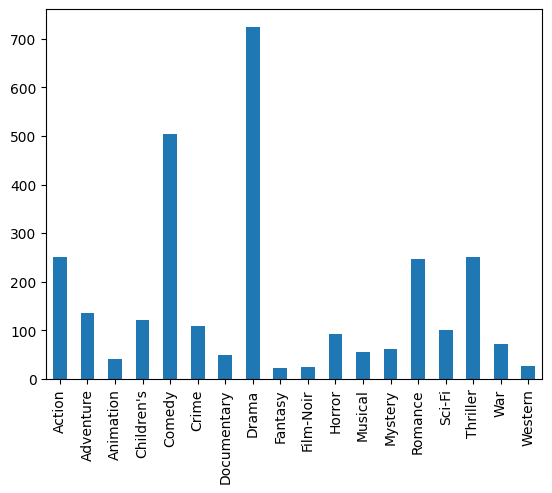

In [ ]:
Movies.iloc[:,3:].sum().plot.bar()

# **3.แสดง users ที่อายุน้อยกว่า 30 ปีและเป็นผู้หญิงเรียงตามอายุมากไปน้อย**

In [ ]:
Users[(Users['age'] > 30) & (Users['gender']=='F')].sort_values(by='age', ascending=False)

,user id,age,gender,occupation,zip code
858,860,70,F,retired,48322
264,266,62,F,administrator,78756
752,754,59,F,librarian,62901
129,131,59,F,administrator,15237
589,591,57,F,librarian,92093
...,...,...,...,...,...
893,895,31,F,librarian,32301
267,269,31,F,librarian,43201
591,593,31,F,educator,68767
728,730,31,F,scientist,32114


# **4.หาค่าเฉลี่ยการให้ rating ของแต่ละ user**

In [ ]:
Ratings.groupby(['user id'])['rating'].mean()

user id
1      3.610294
2      3.709677
3      2.796296
4      4.333333
5      2.874286
         ...   
939    4.265306
940    3.457944
941    4.045455
942    4.265823
943    3.410714
Name: rating, Length: 943, dtype: float64

# **5.แสดงให้เห็นอายุเฉลี่ยของ user ที่เป็น student ผู้หญิง**

In [ ]:
Users[(Users['occupation'] == 'student') & (Users['gender'] == 'F')].iloc[:,1].mean()

20.75

# **6.Movie เรื่องไหนที่ใหม่กว่าปี 1990 ที่ได้คะแนน rating โดยเฉลี่ยต่ำสุด 20 อันดับ โดยดูจากปีที่สร้างหนังหลังวงเล็บชื่อเรื่อง ไม่ได้ดูจาก release date (โชว์ให้เห็นชื่อเรื่อง ไม่ใช่แค่ movie Id)**

In [ ]:
left = Movies[Movies['title'].str[-5:-1] > '1990'].iloc[:, 0:3]
left

,movieId,title,release_date
0,2,GoldenEye (1995),01-Jan-1995
1,3,Four Rooms (1995),01-Jan-1995
2,4,Get Shorty (1995),01-Jan-1995
3,5,Copycat (1995),01-Jan-1995
4,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995
...,...,...,...
1676,1678,Mat' i syn (1997),06-Feb-1998
1677,1679,B. Monkey (1998),06-Feb-1998
1678,1680,Sliding Doors (1998),01-Jan-1998
1679,1681,You So Crazy (1994),01-Jan-1994


In [ ]:
right = Ratings.copy()
result = pd.merge(left,right,left_on = "movieId",right_on ="item id")
result

,movieId,title,release_date,user id,item id,rating,timestamp
0,2,GoldenEye (1995),01-Jan-1995,5,2,3,1997-09-30 16:14:13
1,2,GoldenEye (1995),01-Jan-1995,268,2,2,1997-10-01 22:16:13
2,2,GoldenEye (1995),01-Jan-1995,276,2,4,1997-09-20 21:53:56
3,2,GoldenEye (1995),01-Jan-1995,217,2,3,1998-03-05 03:49:42
4,2,GoldenEye (1995),01-Jan-1995,87,2,4,1997-11-18 18:01:14
...,...,...,...,...,...,...,...
66917,1678,Mat' i syn (1997),06-Feb-1998,863,1678,1,1998-03-07 16:52:50
66918,1679,B. Monkey (1998),06-Feb-1998,863,1679,3,1998-03-07 16:51:31
66919,1680,Sliding Doors (1998),01-Jan-1998,863,1680,2,1998-03-07 16:52:50
66920,1681,You So Crazy (1994),01-Jan-1994,896,1681,3,1998-02-11 01:32:02


In [ ]:
# Sort the result DataFrame by the 'rating' column in descending order
top_ratings = result.groupby(['title'])['rating'].mean().sort_values(ascending=False)

# Display the tail (last) 20 rows
top_20_ratings = top_ratings.tail(20)

top_20_ratings


title
Leopard Son, The (1996)                              1.0
Pharaoh's Army (1995)                                1.0
Tigrero: A Film That Was Never Made (1994)           1.0
Police Story 4: Project S (Chao ji ji hua) (1993)    1.0
Crude Oasis, The (1995)                              1.0
Power 98 (1995)                                      1.0
Promise, The (Versprechen, Das) (1994)               1.0
Hostile Intentions (1994)                            1.0
Homage (1995)                                        1.0
Quartier Mozart (1992)                               1.0
Hedd Wyn (1992)                                      1.0
Gordy (1995)                                         1.0
Girl in the Cadillac (1995)                          1.0
Venice/Venice (1992)                                 1.0
Vermont Is For Lovers (1992)                         1.0
Getting Away With Murder (1996)                      1.0
The Courtyard (1995)                                 1.0
Eye of Vichy, The (Oeil d

# **7.Save ผลลัพธ์จากข้อ 6. ลงไฟล์ csv**

In [ ]:
#save result to file .csv file
result.to_csv('087_Atikan_HW2_7.csv',index=True,header=True)

# **8.หา Correlation ระหว่างอายุและ rating ที่ให้ อธิบายความสัมพันธ์ที่ได้**

In [ ]:
resultCorrelation=pd.merge(Users,Ratings,left_on="user id",right_on="user id").drop(["user id","user id","timestamp","gender","occupation","item id","zip code"],axis=1)
resultCorrelation.corr()

,age,rating
age,1.000000,0.054758
rating,0.054758,1.000000


# **9.ศึกษาคำสั่ง melt ใช้ทำอะไร ยกตัวอย่าง**

In [ ]:
data = {
    'ID': [1, 2, 3],
    'Name': ['Gakpo', 'Bobby', 'Hendo'],
    'Math': [85, 70, 92],
    'Science': [90, 88, 78],
    'History': [78, 92, 85]
}

df = pd.DataFrame(data)

melted_df = pd.melt(df, id_vars=['ID', 'Name'], var_name='Subject', value_name='Score')
melted_df

,ID,Name,Subject,Score
0,1,Gakpo,Math,85
1,2,Bobby,Math,70
2,3,Hendo,Math,92
3,1,Gakpo,Science,90
4,2,Bobby,Science,88
5,3,Hendo,Science,78
6,1,Gakpo,History,78
7,2,Bobby,History,92
8,3,Hendo,History,85
